## Survival Prediction Analysis

In [1]:
import pandas as pd
import numpy as np
file=pd.read_csv(r"C:\Users\admin\Desktop\Imarticus\train_clean.csv" )
actual_df=pd.DataFrame(file)
df=pd.DataFrame(file)
df

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,NaN,S,13.0000,"Montvila, Rev. Juozas",0,887,2,male,0,0.0,211536,Rev,0
887,19.0,B42,S,30.0000,"Graham, Miss. Margaret Edith",0,888,1,female,0,1.0,112053,Miss,0
888,22.0,NaN,S,23.4500,"Johnston, Miss. Catherine Helen ""Carrie""",2,889,3,female,1,0.0,W./C. 6607,Miss,3
889,26.0,C148,C,30.0000,"Behr, Mr. Karl Howell",0,890,1,male,0,1.0,111369,Mr,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          891 non-null    float64
 1   Cabin        204 non-null    object 
 2   Embarked     891 non-null    object 
 3   Fare         891 non-null    float64
 4   Name         891 non-null    object 
 5   Parch        891 non-null    int64  
 6   PassengerId  891 non-null    int64  
 7   Pclass       891 non-null    int64  
 8   Sex          891 non-null    object 
 9   SibSp        891 non-null    int64  
 10  Survived     891 non-null    float64
 11  Ticket       891 non-null    object 
 12  Title        891 non-null    object 
 13  Family_Size  891 non-null    int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 97.6+ KB


In [3]:
df.isna().sum()

Age              0
Cabin          687
Embarked         0
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived         0
Ticket           0
Title            0
Family_Size      0
dtype: int64

In [4]:
df.drop(['Cabin'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          891 non-null    float64
 1   Embarked     891 non-null    object 
 2   Fare         891 non-null    float64
 3   Name         891 non-null    object 
 4   Parch        891 non-null    int64  
 5   PassengerId  891 non-null    int64  
 6   Pclass       891 non-null    int64  
 7   Sex          891 non-null    object 
 8   SibSp        891 non-null    int64  
 9   Survived     891 non-null    float64
 10  Ticket       891 non-null    object 
 11  Title        891 non-null    object 
 12  Family_Size  891 non-null    int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 90.6+ KB


In [5]:
for i in df:
    if df[i].dtype=='object':
        print('%s unique values is %d'%(i,len(set(df[i]))) )

Embarked unique values is 3
Name unique values is 891
Sex unique values is 2
Ticket unique values is 681
Title unique values is 6


In [6]:
df.drop(['Name','PassengerId','Ticket'],axis=1,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          891 non-null    float64
 1   Embarked     891 non-null    object 
 2   Fare         891 non-null    float64
 3   Parch        891 non-null    int64  
 4   Pclass       891 non-null    int64  
 5   Sex          891 non-null    object 
 6   SibSp        891 non-null    int64  
 7   Survived     891 non-null    float64
 8   Title        891 non-null    object 
 9   Family_Size  891 non-null    int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 69.7+ KB


In [8]:
for i in df:
    if df[i].dtype=='object':
        print('%s unique values is %d'%(i,len(set(df[i]))) )

Embarked unique values is 3
Sex unique values is 2
Title unique values is 6


In [9]:
for i in df:
    if df[i].dtype=='float64' or df[i].dtype=='int64':
        h=len(set(df[i]))
        if h<10:
            print("%s the unique values are %s"%(i,set(df[i])))
            print('%s unique values is %d'%(i,h))

Parch the unique values are {0, 1, 2, 3, 4, 5, 6}
Parch unique values is 7
Pclass the unique values are {1, 2, 3}
Pclass unique values is 3
SibSp the unique values are {0, 1, 2, 3, 4, 5, 8}
SibSp unique values is 7
Survived the unique values are {0.0, 1.0}
Survived unique values is 2
Family_Size the unique values are {0, 1, 2, 3, 4, 5, 6, 7, 10}
Family_Size unique values is 9


In [10]:
df[df.duplicated()]

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,Title,Family_Size
47,22.0,Q,7.7500,0,3,female,0,1.0,Miss,0
76,30.0,S,7.8958,0,3,male,0,0.0,Mr,0
77,30.0,S,8.0500,0,3,male,0,0.0,Mr,0
87,30.0,S,8.0500,0,3,male,0,0.0,Mr,0
95,30.0,S,8.0500,0,3,male,0,0.0,Mr,0
...,...,...,...,...,...,...,...,...,...,...
863,22.0,S,69.5500,2,3,female,8,0.0,Miss,10
870,26.0,S,7.8958,0,3,male,0,0.0,Mr,0
877,19.0,S,7.8958,0,3,male,0,0.0,Mr,0
878,30.0,S,7.8958,0,3,male,0,0.0,Mr,0


In [11]:
df.drop_duplicates(keep='first',inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 779 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          779 non-null    float64
 1   Embarked     779 non-null    object 
 2   Fare         779 non-null    float64
 3   Parch        779 non-null    int64  
 4   Pclass       779 non-null    int64  
 5   Sex          779 non-null    object 
 6   SibSp        779 non-null    int64  
 7   Survived     779 non-null    float64
 8   Title        779 non-null    object 
 9   Family_Size  779 non-null    int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 66.9+ KB


In [13]:
df.head()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,Title,Family_Size
0,22.0,S,7.2500,0,3,male,1,0.0,Mr,1
1,38.0,C,71.2833,0,1,female,1,1.0,Mrs,1
2,26.0,S,7.9250,0,3,female,0,1.0,Miss,0
3,35.0,S,53.1000,0,1,female,1,1.0,Mrs,1
4,35.0,S,8.0500,0,3,male,0,0.0,Mr,0


In [14]:
df=pd.get_dummies(df)
df

,Age,Fare,Parch,Pclass,SibSp,Survived,Family_Size,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rev
0,22.0,7.2500,0,3,1,0.0,1,0,0,1,0,1,0,0,0,1,0,0
1,38.0,71.2833,0,1,1,1.0,1,1,0,0,1,0,0,0,0,0,1,0
2,26.0,7.9250,0,3,0,1.0,0,0,0,1,1,0,0,0,1,0,0,0
3,35.0,53.1000,0,1,1,1.0,1,0,0,1,1,0,0,0,0,0,1,0
4,35.0,8.0500,0,3,0,0.0,0,0,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,13.0000,0,2,0,0.0,0,0,0,1,0,1,0,0,0,0,0,1
887,19.0,30.0000,0,1,0,1.0,0,0,0,1,1,0,0,0,1,0,0,0
888,22.0,23.4500,2,3,1,0.0,3,0,0,1,1,0,0,0,1,0,0,0
889,26.0,30.0000,0,1,0,1.0,0,1,0,0,0,1,0,0,0,1,0,0


### Q1. Select the information of the people who paid the top 10 highest fares and state your observation ?

In [15]:
top_fair_df=actual_df.sort_values(by='Fare',ascending=False).iloc[:10,:]
top_fair_df

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
258,35.0,NaN,C,512.3292,"Ward, Miss. Anna",0,259,1,female,0,1.0,PC 17755,Miss,0
737,35.0,B101,C,512.3292,"Lesurer, Mr. Gustave J",0,738,1,male,0,1.0,PC 17755,Mr,0
679,36.0,B51 B53 B55,C,512.3292,"Cardeza, Mr. Thomas Drake Martinez",1,680,1,male,0,1.0,PC 17755,Mr,1
88,23.0,C23 C25 C27,S,263.0000,"Fortune, Miss. Mabel Helen",2,89,1,female,3,1.0,19950,Miss,5
27,19.0,C23 C25 C27,S,263.0000,"Fortune, Mr. Charles Alexander",2,28,1,male,3,0.0,19950,Mr,5
341,24.0,C23 C25 C27,S,263.0000,"Fortune, Miss. Alice Elizabeth",2,342,1,female,3,1.0,19950,Miss,5
438,64.0,C23 C25 C27,S,263.0000,"Fortune, Mr. Mark",4,439,1,male,1,0.0,19950,Mr,5
311,18.0,B57 B59 B63 B66,C,262.3750,"Ryerson, Miss. Emily Borie",2,312,1,female,2,1.0,PC 17608,Miss,4
742,21.0,B57 B59 B63 B66,C,262.3750,"Ryerson, Miss. Susan Parker ""Suzette""",2,743,1,female,2,1.0,PC 17608,Miss,4
118,24.0,B58 B60,C,247.5208,"Baxter, Mr. Quigg Edmond",1,119,1,male,0,0.0,PC 17558,Mr,1


### Q2. What percentage of females from the 1st class survived?

In [16]:
survided=len(df.loc[(actual_df['Pclass']==1) & (actual_df['Sex']=='female') & (actual_df['Survived']==1.0)])
print(survided)
not_survided=len(df.loc[(actual_df['Pclass']==1) & (actual_df['Sex']=='female') & (actual_df['Survived']==0.0)])
print(not_survided)
print((survided*100)/(survided+not_survided))

91
3
96.80851063829788


Text(0.5, 1.0, '1st class female people')

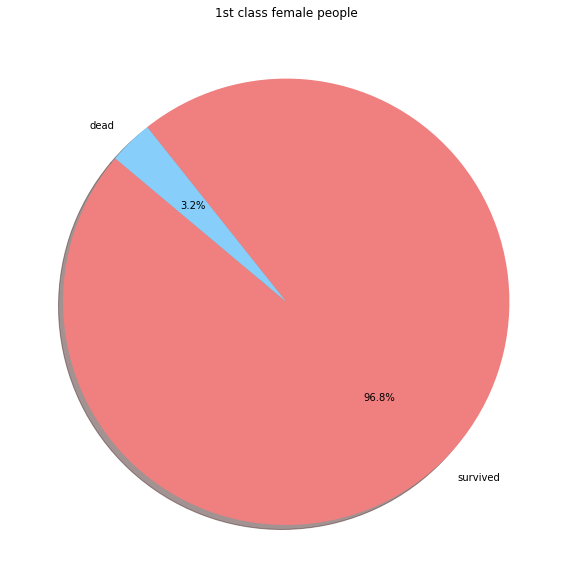

In [17]:
import matplotlib.pyplot as mtp
labels=['survived','dead']
sizes=[survided,not_survided]
color=['lightcoral','lightskyblue']
f,ax=mtp.subplots(figsize=(10,15))
mtp.pie(sizes,labels=labels,colors=color,shadow=True,startangle=140,autopct='%1.1f%%')
mtp.title('1st class female people')

### Q3. Build a ensemle learning model using bagging technique ?

In [18]:
df.corr().style.background_gradient(cmap='rainbow')

,Age,Fare,Parch,Pclass,SibSp,Survived,Family_Size,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rev
Age,1.000000,0.095054,-0.193223,-0.354920,-0.295954,-0.075944,-0.299478,0.055648,-0.046203,-0.022632,-0.097997,0.097997,0.091436,-0.414553,-0.296254,0.248775,0.196955,0.085654
Fare,0.095054,1.000000,0.190740,-0.549990,0.134090,0.244245,0.191504,0.281758,-0.109753,-0.187729,0.165621,-0.165621,0.025750,0.000726,0.113394,-0.162382,0.092128,-0.028195
Parch,-0.193223,0.190740,1.000000,0.045199,0.383730,0.063793,0.793678,-0.023970,-0.066474,0.060620,0.229279,-0.229279,-0.047721,0.263285,0.082707,-0.326922,0.211402,-0.026675
Pclass,-0.354920,-0.549990,0.045199,1.000000,0.096451,-0.334799,0.087987,-0.260586,0.212313,0.108362,-0.114089,0.114089,-0.106413,0.100899,-0.004856,0.087909,-0.139806,-0.024765
SibSp,-0.295954,0.134090,0.383730,0.096451,1.000000,-0.045441,0.866326,-0.066524,-0.000583,0.059929,0.084589,-0.084589,0.003242,0.403093,0.045306,-0.255863,0.062654,-0.031849
Survived,-0.075944,0.244245,0.063793,-0.334799,-0.045441,1.000000,0.004570,0.179618,-0.040909,-0.136790,0.511726,-0.511726,0.002445,0.069021,0.298430,-0.514177,0.336645,-0.074345
Family_Size,-0.299478,0.191504,0.793678,0.087987,0.866326,0.004570,1.000000,-0.056789,-0.036339,0.072268,0.179739,-0.179739,-0.023675,0.407953,0.074582,-0.345383,0.155619,-0.035409
Embarked_C,0.055648,0.281758,-0.023970,-0.260586,-0.066524,0.179618,-0.056789,1.000000,-0.141358,-0.812441,0.094814,-0.094814,0.020689,-0.055439,0.043567,-0.065719,0.077976,-0.043910
Embarked_Q,-0.046203,-0.109753,-0.066474,0.212313,-0.000583,-0.040909,-0.036339,-0.141358,1.000000,-0.462344,0.040688,-0.040688,0.024812,0.024583,0.124745,-0.061401,-0.084746,0.030948
Embarked_S,-0.022632,-0.187729,0.060620,0.108362,0.059929,-0.136790,0.072268,-0.812441,-0.462344,1.000000,-0.108888,0.108888,-0.033145,0.035178,-0.112492,0.095027,-0.019931,0.021103


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 779 entries, 0 to 890
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           779 non-null    float64
 1   Fare          779 non-null    float64
 2   Parch         779 non-null    int64  
 3   Pclass        779 non-null    int64  
 4   SibSp         779 non-null    int64  
 5   Survived      779 non-null    float64
 6   Family_Size   779 non-null    int64  
 7   Embarked_C    779 non-null    uint8  
 8   Embarked_Q    779 non-null    uint8  
 9   Embarked_S    779 non-null    uint8  
 10  Sex_female    779 non-null    uint8  
 11  Sex_male      779 non-null    uint8  
 12  Title_Dr      779 non-null    uint8  
 13  Title_Master  779 non-null    uint8  
 14  Title_Miss    779 non-null    uint8  
 15  Title_Mr      779 non-null    uint8  
 16  Title_Mrs     779 non-null    uint8  
 17  Title_Rev     779 non-null    uint8  
dtypes: float64(3), int64(4), uint8

In [20]:
df=df.iloc[:,[0,1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,5]]

In [21]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [22]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
x=ms.fit_transform(x)

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [24]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
ensem=BaggingClassifier(DecisionTreeClassifier(random_state=0))
ensem.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=0))

In [25]:
y_pred=ensem.predict(x_test)

In [26]:
from sklearn import metrics
bagging_score = metrics.roc_auc_score(y_test, y_pred)
print(bagging_score)

0.7707201086956521


### Q4. What is area under the roc curve and plot it?
Note : Legend should contain auc_roc score

[0.         0.13043478 1.        ]
[0.       0.671875 1.      ]


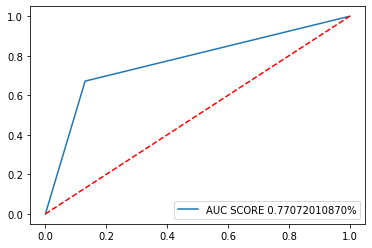

In [27]:
import matplotlib.pyplot as mtp
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
print(fpr)
print(tpr)   
mtp.plot(fpr,tpr,label="AUC SCORE %1.11f%%"%(bagging_score))
mtp.plot([0,1],[0,1],'r--')
mtp.legend(loc='lower right')

### Q5. Build a model using AdaBoost and compare it's performance with above model ?

In [28]:
from sklearn.ensemble import AdaBoostClassifier
a_class=AdaBoostClassifier(random_state=0)
a_class.fit(x_train,y_train)
y_pred_a=a_class.predict(x_test)
k=roc_auc_score(y_test,y_pred_a)
k

0.7459239130434783

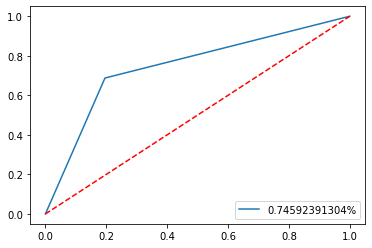

In [29]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_a)
mtp.plot(fpr,tpr,label="%1.11f%%"%(k))
mtp.plot([0,1],[0,1],'r--')
mtp.legend(loc='lower right')

In [30]:
f=pd.DataFrame()
f['Model']=['baggingClassifier','AdaBoostClassifier']
f['rou_auc_score']=[bagging_score,k]
f

,Model,rou_auc_score
0,baggingClassifier,0.770720
1,AdaBoostClassifier,0.745924
